<a href="https://colab.research.google.com/github/normidar/Ai-Codes/blob/master/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 获得数据
from sklearn import datasets
# 手写数字数据集
data = datasets.load_digits()
print(len(data.data))
print(len(data.data[0]))


1797
64


In [ ]:
from sklearn.model_selection import train_test_split
# 数据分割
xt, x_t, yt, y_t = train_test_split(data.data, data.target, test_size=0.2)
print(len(y_t))

360


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# 这句代码设定准备测试的参数集，直接复制即可，后面会选出最优参数
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}

# 执行像素搜索，会在fit的时候自动从上面的参数中选择最优参数，scoring='accuracy'就是标记使用此功能
# cv是交叉验证的次数，实际上默认值也是5，所以可以省略
clf = GridSearchCV(SVC(), parameters, scoring='accuracy', cv=5)
clf.fit(xt, yt)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# 打印下最优 分数和参数 利用交叉验证进行 评分评参
print('Accuracy =', clf.best_score_)
print(clf.best_params_)

Accuracy = 0.9756533101045296
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
# 对模组进行正确率评分
clf.score(x_t,y_t)

0.9916666666666667

[1]
1


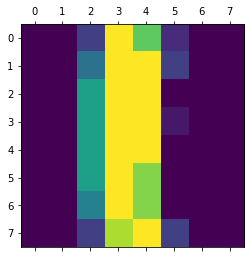

In [ ]:
import numpy as np
# 绘图工具
import matplotlib.pyplot as plt
# 这一句使得输出器可以绘图
%matplotlib inline

# 可视化查看数据
# 指定一个360以内的索引
number = 200
dat = np.array([x_t[number]])
# 利用模组推测是哪个数字
print(clf.predict(dat))
# 显示图像
plt.matshow(dat.reshape(8,8))
# 显示答案（target）
print(y_t[number])

In [ ]:
# 寻找错误项
for i in range(360):
  kotae = clf.predict([x_t[i]])
  if kotae != y_t[i]:
    print(i)
    print(kotae)
    print(y_t[i])

5
[4]
7
78
[9]
3
308
[8]
1
